
# P1 Computational Vision

**Important:** Read the file `README.md` before start coding.

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">

**Delivery**
<ol>

Requirements to fulfill:
<ul>
    <li>  Answer the questions introduced in the exercises.
    <li>  The implemented code should be,<br>
        - optimized ( e.g. do not use 'for' instruction when indexing numpy arrays)<br>
        - readable  ( e.g. avoiding the implementation of more than 2 loops within a line)<br>
        - commented and with descriptions        
    <li> The deliverable must be a file named P1_Student1_Student2.zip that includes:
    <ul>
        <li> The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
         <li> All the images used in this notebook.
    </ul>

</ul>

 **Deadline (Campus Virtual): October 14th, 23:00 h** 


</ol>
</div>

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

We will work with the following concepts: image creation, data types, image manipulation.


### Packages loading 

First, we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import img_as_float64 # useful for cast transformations to float64
from skimage import io # useful for image loading and saving
from skimage import transform as tf # useful for image transformations
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation, saving and loading

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 1**: 
<ol>
<li> Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 
<li> How many values can have each pixel in this case? 

<li> Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 
<img src="images_notebook/ex11.png">
<li> Visualize the image and print the values of its first row. 
<li> Use the IO image package to save the image previously created. Delete the variable used to the image.
<li> Load the saved image and visualize it.

</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

In [3]:
image = np.zeros(shape=(150, 200), dtype=np.uint8)

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Answer**

Each pixel can have 2^8 different values = 256 [0, 255]

</div>

In [4]:
image[:, 100:] = 255

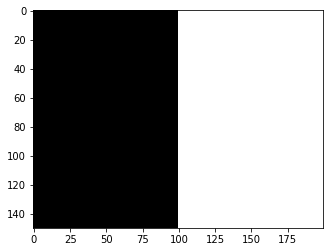

In [5]:
# We display the image with the graymap colorscale
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
io.imsave('images/half_bw.bmp', image)
del image

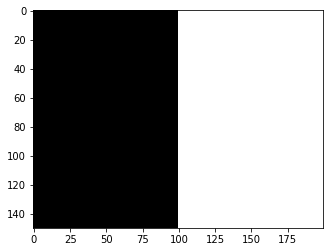

In [7]:
image = io.imread('images/half_bw.bmp')
plt.imshow(image, cmap='gray')
plt.show()

### 1.2 Color image manipulation


<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 2**: 
<ol>
<li> Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex12a.png">

<li> Using these three images, construct the following color image:
<img src='./images_notebook/ex12b.png'>

</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

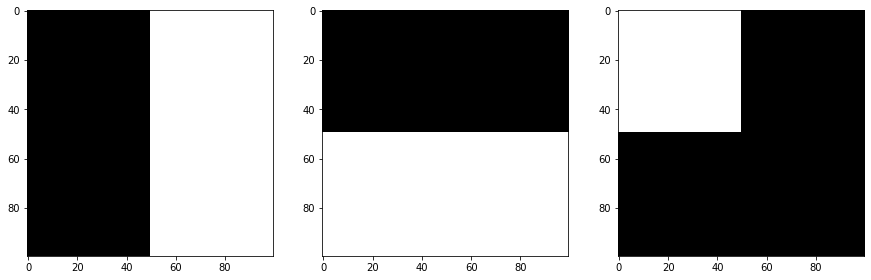

In [8]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

bw_1 = np.zeros(shape=(100, 100), dtype=np.uint8)
bw_1[:, 50:] = 255
ax[0].imshow(bw_1, cmap='gray')

bw_2 = np.zeros(shape=(100, 100), dtype=np.uint8)
bw_2[50:, :] = 255
ax[1].imshow(bw_2, cmap='gray')

bw_3 = np.zeros(shape=(100, 100), dtype=np.uint8)
bw_3[:50, :50] = 255
ax[2].imshow(bw_3, cmap='gray')

plt.show()

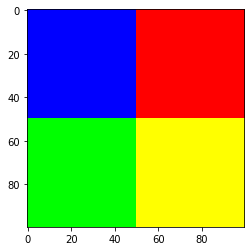

In [9]:
# We stack the 3 images obtaining the 3 channels corresponding to the desired color palette
image_colors = np.dstack([bw_1, bw_2, bw_3])
plt.imshow(image_colors)
plt.show()

<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 3**: 
<ol>
<li> Read and visualize the image `sillas.jpg` (see figure top). 
<li> Extract its three channels and visualize them in the same figure with their respective titles (Red channel, Green channel and Blue channel).

<li> Construct and visualize a new image in which the red color of the chairs is changed to blue.

</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

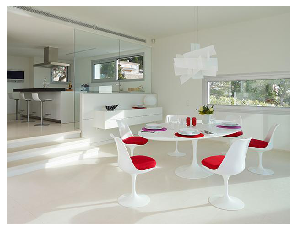

In [10]:
sillas = io.imread('images/sillas.jpg')
plt.imshow(sillas)
plt.axis('off')
plt.show()

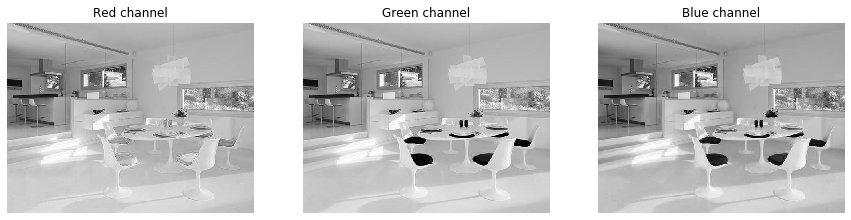

In [11]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('Red channel')
ax[0].imshow(sillas[:, :, 0], cmap='gray')
ax[0].axis('off')

ax[1].set_title('Green channel')
ax[1].imshow(sillas[:, :, 1], cmap='gray')
ax[1].axis('off')

ax[2].set_title('Blue channel')
ax[2].imshow(sillas[:, :, 2], cmap='gray')
ax[2].axis('off')

plt.show()

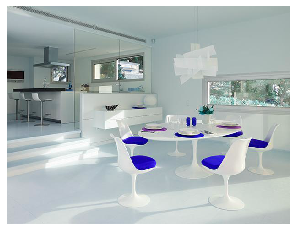

In [12]:
blue_sillas = sillas.copy()
blue_sillas[:, :, 0] = sillas[:, :, 2]
blue_sillas[:, :, 2] = sillas[:, :, 0]

plt.imshow(blue_sillas)
plt.axis('off')
plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

The red channel is the only predominant color on the chair pillows, and similar intensities with the other channels in the rest of the image, so we can swap  red and blue channels in order to get blue chairs.


</div>

### 1.3 Masks and logical image manipulation

<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 4**: 
<ol>
<li> Read the image `circles.bmp` (see figure top) 

<li>  Define 3 images in such a way that each one contains only 1 ball (see figure bottom). Balls should be extracted by defining their grey value range.

<li>  Visualize the 3 images in the same figure. Add titles to the figures

<img src="images_notebook/ex13.png">

**Note:** You can use command unique of Numpy to find the unique values in the image.


</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

In [13]:
circles = io.imread('images/circles.bmp')

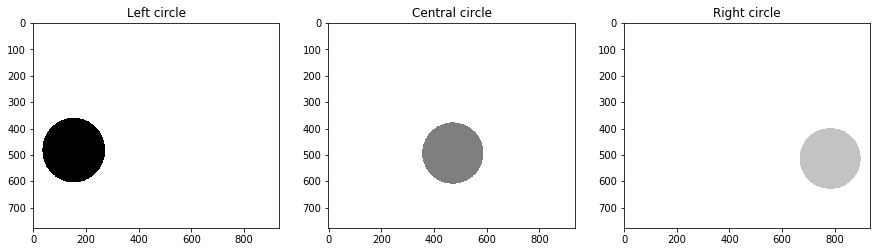

In [14]:
bw_cir = np.mean(circles, axis=2).astype(np.uint8)

f, ax = plt.subplots(1, 3, figsize=(15, 5))

left = bw_cir.copy()
left[left > 100] = 255
ax[0].set_title('Left circle')
ax[0].imshow(left, cmap='gray', vmin=0, vmax=255)

middle = bw_cir.copy()
middle[(middle < 100) | (middle > 150)] = 255
ax[1].set_title('Central circle')
ax[1].imshow(middle, cmap='gray', vmin=0, vmax=255)

right = bw_cir.copy()
right[right < 150] = 255
ax[2].set_title('Right circle')
ax[2].imshow(right, cmap='gray', vmin=0, vmax=255)

plt.show()

### 1.4 Images manipulation

<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 5**: 
<ol>
<li> Load and show the image `lenna.jpg`.
<li> Check its dimensions. <br>

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

<li> Convert the previous image to grayscale, and visualize and save it. Note that there are 2 different solutions for the conversion.

<li> Check the range of the values of the image, and print the 10th row.

<li> Convert the lena image into a boolean image, by applying a binarization to the grayscale image (setting to 0 all values equal or below 100 and to 1 otherwise). 

<li> Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

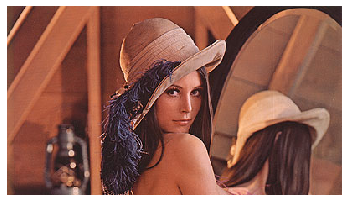

In [15]:
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna)
plt.axis('off')
plt.show()

In [16]:
print(lenna.shape)

(225, 400, 3)


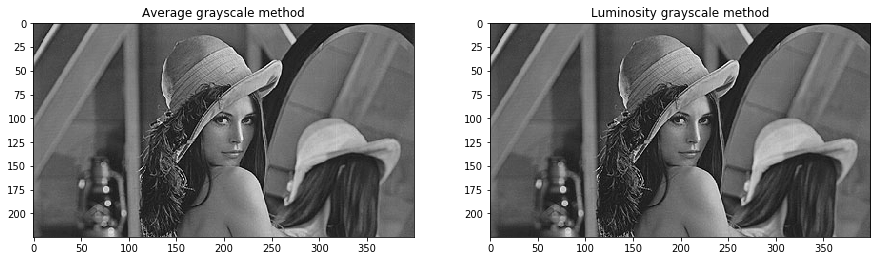

In [17]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Solution 1: Average method
lenna_gs = np.mean(lenna, axis=2)
ax[0].set_title('Average grayscale method')
ax[0].imshow(lenna_gs, cmap='gray')

# Solution 2: Weighted/Luminosity method
# (We keep this version as it tends to give better results)
lenna_gs = 0.2126 * lenna[:, :, 0] + 0.7152 * lenna[:, :, 1] + 0.0722 * lenna[:, :, 2]
ax[1].set_title('Luminosity grayscale method')
ax[1].imshow(lenna_gs, cmap='gray')

plt.show()
io.imsave('images/lenna_gs.bmp', lenna_gs.astype(np.uint8))

In [18]:
print(f'Lenna grayscale image values in range [{lenna_gs.min():.6f}, {lenna_gs.max():.6f}]')
print(lenna_gs[10,:])

Lenna grayscale image values in range [0.361000, 251.678800]
[ 77.3344  78.6244  76.774   74.064   74.711   75.2084  71.9184  67.5602
  66.7796  66.4266  56.0014  49.504   66.3636  49.6536  44.1562  34.4462
 128.2514 182.8788 195.5756 189.9166 181.1946 158.5476 127.8352  80.9772
  67.4066  54.2702  49.2834  58.3596  64.5722  63.559   65.614   73.5326
  66.8884  70.1784  68.1784  68.1784  72.9658  71.9658  68.4684  69.4684
  68.9658  68.9658  67.9658  68.4684  68.4684  68.7584  69.7584  69.7584
  73.614   73.614   68.324   64.4684  67.4684  70.4684  62.9658  50.9658
  96.5142 137.5022 158.1292 158.4702 158.747  158.6014 150.2472 130.2552
 117.4666 114.901  114.901  116.901  118.8328 117.8328 116.4798 115.4798
 114.4798 114.4798 113.9772 114.8328 115.3302 116.3302 118.611  119.611
 117.901  119.901  119.901  119.901  119.901  122.901  122.901  121.901
 122.901  120.901  119.901  120.901  123.901  126.901  128.901  129.901
 129.4666 128.4666 127.901  124.901  119.8328 115.8328 116.3354 11

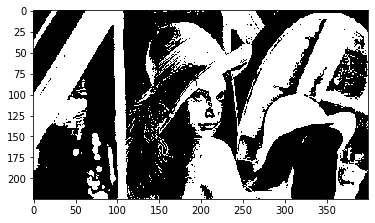

In [19]:
lenna_binary = (lenna_gs > 100)
plt.imshow(lenna_binary, cmap='binary_r')
plt.show()

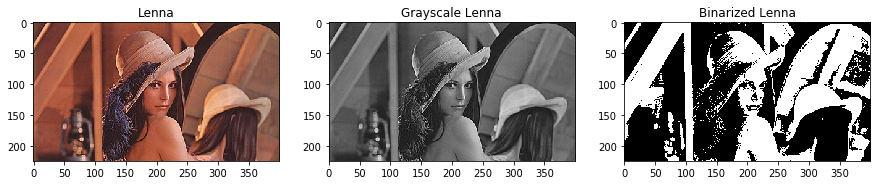

In [20]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('Lenna')
ax[0].imshow(lenna)

ax[1].set_title('Grayscale Lenna')
ax[1].imshow(lenna_gs, cmap='gray')

ax[2].set_title('Binarized Lenna')
ax[2].imshow(lenna_binary, cmap='gray')

plt.show()

<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 6**: 
<ol>
<li> Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. 

We recommend to create a bigger black image to later embed the original image in the central part

<img src="images_notebook/lena_frame.png">

<li> Change the mask of the framed image to red. 

</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

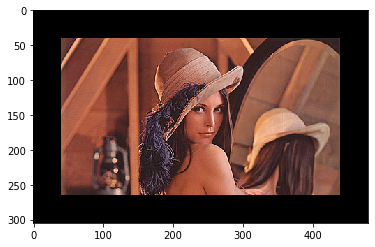

In [21]:
lw, lh = lenna.shape[0:2]
offset = lh // 10

black_frame = np.zeros(shape=(lw + 2*offset, lh + 2*offset, 3), dtype=np.uint8)

black_frame[offset:offset+lw, offset:offset+lh, :] = lenna
plt.imshow(black_frame)
plt.show()

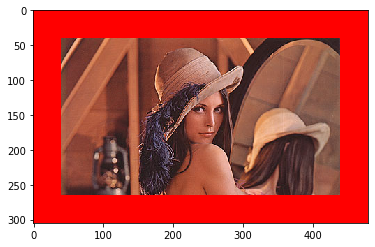

In [22]:
red_frame = black_frame.copy()
red_frame[:offset, :, 0] = 255
red_frame[-offset:, :, 0] = 255
red_frame[:, :offset, 0] = 255
red_frame[:, -offset:, 0] = 255

plt.imshow(red_frame)
plt.show()

<div class = "alert alert-light" style = "border-radius:10px;border-width:3px;border-color:darkgray;font-family:Verdana,sans-serif;font-size:16px;">

**Exercise 7**: 
<ol>
<li> Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). 

<li> Use the image with a texture, 'texture.png', and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.


</ol>
</div>

Add your solution in separate cells for each one of the parts of the exercise:

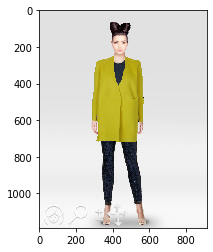

In [23]:
coat = io.imread('images/coat.png')[:, :, :3]
model = io.imread('images/model.png')[:, :, :3]

model[coat[:, :, :] > 0] = 0

plt.imshow(model + coat)
plt.show()

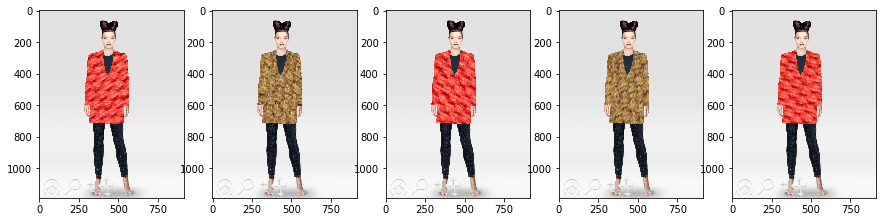

In [24]:
texture1 = io.imread('images/texture.png')
texture2 = io.imread('images/texture2.png')

def texturize(texture, rotate=True):
    w, h = coat.shape[0: 2]
    
    if rotate:
        # Apply random rotation to the image
        angle = np.random.randint(0, 359)
        texture = tf.rotate(texture, angle)
    
    # Apply random order interpolation for the resize
    order = np.random.choice([0, 1, 3, 4, 5])
    texture = tf.resize(texture, (w, h, 3), order=order)
    
    texture[coat == 0] = 0
    return texture


# Generate 5 texturized coat samples
samples = 5
f, ax = plt.subplots(1, samples, figsize=(15, 5))

for i in range(samples):
    tex = np.random.choice([texture1, texture2])
    ax[i].imshow(img_as_float64(model) + texturize(tex))
    
plt.show()